# Install the data

In [ ]:
# pip install networkx==2.3
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import re
import numpy as np
from collections import Counter
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
plt.style.use('ggplot')
pd.set_option('display.max_colwidth', 100)

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import nltk

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
root_path = 'gdrive/My Drive/Colab Notebooks/'

# **DATA COLLECTION**

TWEET DATA COLLECTED FROM THE TWITTER FOR 20TH APR TO 21ST MAY 2019 AND ALL ARE PUT INTO CSV FORMATS AND USED TO MODEL THE DATA

# Tweets Data Analysis

In [ ]:
# Load dataset
def load_data():
    data = pd.read_csv("gdrive/My Drive/Colab Notebooks/srilanka_easter.csv")
    data.columns = data.columns.str.replace(' ','_')
    return data


def load_credible_data():
    data = pd.read_csv("gdrive/My Drive/Colab Notebooks/credible_tweets.csv")
    data.columns = data.columns.str.replace(' ','_')
    return data

tweet_credible_df = load_credible_data()
tweet_credible_df.head(2)

In [ ]:
ordinary_tweets_data = load_data()
#tweet_df.head(2)



NameError: ignored

In [ ]:
print('Dataset size:',ordinary_tweets_data.shape)
print('Columns are:',ordinary_tweets_data.columns)

In [ ]:
sns.countplot(x = 'Verified_or_Non-Verified', data = ordinary_tweets_data)

In [ ]:
sns.countplot(x = 'Tweet_Type', data = ordinary_tweets_data)

In [ ]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# Start with one review:
df_Verified = ordinary_tweets_data[ordinary_tweets_data['Verified_or_Non-Verified']=='Verified']
df_NVerified = ordinary_tweets_data[ordinary_tweets_data['Verified_or_Non-Verified']=='Non-Verified']
tweet_All = " ".join(review for review in ordinary_tweets_data.Tweet_Content)
tweet_Verified = " ".join(review for review in df_Verified.Tweet_Content)
tweet_NVerified = " ".join(review for review in df_NVerified.Tweet_Content)

fig, ax = plt.subplots(3, 1, figsize  = (10,10))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_Verified = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_Verified)
wordcloud_NVerified = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_NVerified)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_Verified, interpolation='bilinear')
ax[1].set_title('Tweets under Verified Class',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_NVerified, interpolation='bilinear')
ax[2].set_title('Tweets under Non-Verified class',fontsize=30)
ax[2].axis('off')



---



---



**Cleaning Tweets Data**



---



---



In [ ]:
#nltk.download('stopwords')
ps = nltk.PorterStemmer()
string.punctuation
wn = nltk.WordNetLemmatizer()

from nltk.corpus import stopwords
stopwords = stopwords.words('english')
#print(stop_words)

#from nltk.corpus import stopwords
#stopword = nltk.corpus.stopwords.words('english')

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

def tokenization(text):
    text = re.split('\W+', text)
    return text

def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

import re
def untokenize(words):
    """
    Untokenizing a text undoes the tokenizing operation, restoring
    punctuation and spaces to the places that people expect them to be.
    Ideally, `untokenize(tokenize(text))` should be identical to `text`,
    except for line breaks.
    """
    text = ' '.join(words)
    step1 = text.replace("`` ", '"').replace(" ''", '"').replace('. . .',  '...')
    step2 = step1.replace(" ( ", " (").replace(" ) ", ") ")
    step3 = re.sub(r' ([.,:;?!%]+)([ \'"`])', r"\1\2", step2)
    step4 = re.sub(r' ([.,:;?!%]+)$', r"\1", step3)
    step5 = step4.replace(" '", "'").replace(" n't", "n't").replace(
         "can not", "cannot")
    step6 = step5.replace(" ` ", " '")
    return step6.strip()


In [ ]:
ordinary_tweets_data.head(2)

In [ ]:
pattern='Colombo,Sri Lanka |Colombo, Sri Lanka|Sri Lanka| Srilanka ðŸ‡±ðŸ‡° |Colombo|Colombo, Srilanka|Colombo Sri Lanka|Sri Lankan'

mask=ordinary_tweets_data['Tweet_Location'].str.contains(pattern,case=False,na=False)
ordinary_tweets_data_mask=ordinary_tweets_data[mask]


In [ ]:
#df  = pd.DataFrame(tweet_df[['Tweet_Id','User_Id', 'Tweet_Content']])

df  = pd.DataFrame(ordinary_tweets_data_mask[['Tweet_Id','Tweet_Type','User_Id','Name','Screen_Name', 'Tweet_Content','Retweets_Received','Favourites_Received',
                            'Verified_or_Non-Verified','User_Followers','User_Following','Favourites_Count','Statuses_Count',
                             'User_Account_Creation_Date','User_Bio','Tweet_Location','Tweet_Posted_Time_(UTC)','Protected_or_Non-protected']])

df_credible  = pd.DataFrame(tweet_credible_df[['Tweet_Id','Tweet_Type','User_Id','Name','Screen_Name', 'Tweet_Content','Retweets_Received','Favourites_Received',
                            'Verified_or_Non-Verified','User_Followers','User_Following','Favourites_Count','Statuses_Count',
                             'User_Account_Creation_Date','User_Bio','Tweet_Location','Tweet_Posted_Time_(UTC)','Protected_or_Non-protected']])

In [ ]:
df["Tweet_Content_URL"] = df["Tweet_Content"].str.replace(r'\s*https?://\S+(\s+|$)', ' ').str.strip()
df['Tweet_punct'] = df['Tweet_Content_URL'].apply(lambda x: remove_punct(x))
df['User_Id_punct'] = df['User_Id'].apply(lambda x: x.replace('"', ''))
df['Tweet_Id_punct'] = df['Tweet_Id'].apply(lambda x: x.replace('"', ''))
df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))
df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
#df.head(1)

##################################

#cleaning the credible datasource 

df_credible["Tweet_Content_URL"] = df_credible["Tweet_Content"].str.replace(r'\s*https?://\S+(\s+|$)', ' ').str.strip()
df_credible['Tweet_punct'] = df_credible['Tweet_Content_URL'].apply(lambda x: remove_punct(x))
df_credible['User_Id_punct'] = df_credible['User_Id'].apply(lambda x: x.replace('"', ''))
df_credible['Tweet_Id_punct'] = df_credible['Tweet_Id'].apply(lambda x: x.replace('"', ''))
df_credible['Tweet_tokenized'] = df_credible['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df_credible['Tweet_nonstop'] = df_credible['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df_credible['Tweet_stemmed'] = df_credible['Tweet_nonstop'].apply(lambda x: stemming(x))
df_credible['Tweet_lemmatized'] = df_credible['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df_credible.head(1)



---



---



#                          **MODEL ONE**







---



---



In [ ]:
# Load dataset
def load_data():
    data = pd.read_csv("gdrive/My Drive/Colab Notebooks/ordinary.csv")
    data.columns = data.columns.str.replace(' ','_')
    return data

In [ ]:
tweet_df = load_data()
#tweet_df['location'].head(2)
tweet_df.head()
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed:_0       122 non-null    int64 
 1   screen_name      122 non-null    object
 2   User_Id          122 non-null    int64 
 3   Name             122 non-null    object
 4   followers_count  122 non-null    int64 
 5   friends_count    122 non-null    int64 
 6   created_at       122 non-null    object
 7   statuses_count   122 non-null    int64 
 8   listed_count     122 non-null    int64 
 9   location         121 non-null    object
 10  verified         122 non-null    bool  
 11  User_Bio         114 non-null    object
dtypes: bool(1), int64(6), object(5)
memory usage: 10.7+ KB


 **cleaning and filtering the data set**

In [ ]:
pattern='Colombo,Sri Lanka |Colombo, Sri Lanka|Sri Lanka| Srilanka ðŸ‡±ðŸ‡° |Colombo|Colombo, Srilanka|Colombo Sri Lanka|Sri Lankan'

mask=tweet_df['location'].str.contains(pattern,case=False,na=False)
tweet_df1=tweet_df[mask]

In [ ]:
model1_data=tweet_df1.copy()

In [ ]:
model1_data.head(2)

,Unnamed:_0,screen_name,User_Id,Name,followers_count,friends_count,created_at,statuses_count,listed_count,location,verified,User_Bio
0,0,ChandaniKirinde,1951067186,Chandani Kirinde 🇱🇰,11130,1396,2013-10-10 06:53:14,50075,152,"Colombo,Sri Lanka",False,Journalist. Views my own. https://t.co/ivWnn71wIn
1,1,vipulananda,9909452,Vipulananda 🇱🇰,3049,5000,2007-11-03 07:37:38,124348,352,"Colombo, Sri Lanka",False,விபுலானந்தா විපුල් | Journalist | Editor | Activist | GCC Media Personnel | https://t.co/CUsSmHLmJc


In [ ]:
# Mandatory attributes# Age of the account# Number of followers# Number of friends# Verified Status# Number of tweets
# Optional Attributes# Location# Number of lists# Has a bio

def calculateAgeScore(age):
  if age <= 0:
    return 0
  elif age > 0 and age <= 6:
    return 1
  elif age > 6 and age <= 24:
    return 2
  elif age > 24 and age <= 60:
    return 3
  elif age > 60 and age <= 120:
    return 4
  elif age > 120:
    return 5
  else :
    return 0


def calculateFollowerRatioScore(row):
 if row['friends_count'] == 0:
  return 0

 ratio = row['followers_count'] / row['friends_count']

 if ratio < 0.5:
  return 0
 elif ratio >= 0.5 and ratio <= 1:
  return 1
 elif ratio > 1 and ratio <= 2:
  return 2
 elif ratio > 2 and ratio <= 5:
  return 3
 elif ratio > 5 and ratio <= 10:
  return 4
 elif ratio > 10:
  return 5
 else :
  return 0


def calculateVerifiedStatusScore(isVerified):
 if isVerified:
    return 5
 else :
    return 0

def calculateLocationScore(location):
 if pd.isnull(location):
  return 0
 elif "sri lanka" in location.lower() or "srilanka" in location.lower() or "colombo" in location.lower():
  return 5
 elif pd.isnull(location) is False:
  return 4

def calculateUserListsScore(lists):
 if lists < 2:
  return 0
 elif lists >= 2 and lists <= 10:
  return 1
 elif lists > 10 and lists <= 30:
  return 2
 elif lists > 30 and lists <= 60:
  return 3
 elif lists > 60 and lists <= 90:
  return 4
 elif lists > 90:
  return 5

def calculateUserBioScore(bio):
 if pd.isnull(bio):
  return 0
 else :
  return 5

def getNormalizedTrustScore(x):
 minX = 0
 maxX = 7.5
 return (x - minX) / maxX - minX
import datetime
from dateutil.parser import parse
from datetime import datetime

def getAgeFromCreatedDate(date_str):

 #start_date = datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
 start_date=date_str
 end_date = datetime(2019, 5, 20, 00, 00, 00)
 num_of_days=end_date -parse(start_date)
 num_months=num_of_days/30 
 #age=int(num_months)
 #num_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)
 #age= (num_months / np.timedelta64(1, 'D')).astype(int)
 return num_months

def calculateTweetCountScore(tweets):
  if tweets <= 10:
   return 0
  elif tweets > 10 and tweets <= 100:
   return 1
  elif tweets > 100 and tweets <= 1000:
   return 2
  elif tweets > 1000 and tweets <= 5000:
   return 3
  elif tweets > 5000 and tweets <= 10000:
   return 4
  elif tweets > 10000:
   return 5
  else :
   return 0


def getNormalizedTrustScore(x):
 minX = 0
 maxX = 7.5
 return (x - minX) / maxX - minX

In [ ]:
model_1_result=model1_data[['User_Id', 'Name']].copy()

# Mandatory attributes# Age of the account# Number of followers# Number of friends# Verified Status# Number of tweets
# Optional Attributes# Location# Number of lists# Has a bio

# Mandatory attributes#
model_1_result['verifiedStatus'] = model1_data['verified'].apply(calculateVerifiedStatusScore)

model_1_result['getAgeFromCreatedDate'] = model1_data['created_at'].apply(getAgeFromCreatedDate)
model_1_result['getAgeFromCreatedDate'] = pd.to_numeric(model_1_result['getAgeFromCreatedDate'].dt.days, downcast='integer')
model_1_result['calculateAgeScore'] = model_1_result['getAgeFromCreatedDate'].apply(calculateAgeScore)

model_1_result['followerRatioScore'] =model1_data.apply(lambda row:calculateFollowerRatioScore(row), axis=1)

model_1_result['tweetCountScore'] =  model1_data['statuses_count'].apply(calculateTweetCountScore)



#Optional Attributes#
model_1_result['User_Bio'] = model1_data['User_Bio'].apply(calculateUserBioScore)
model_1_result['user_location'] = model1_data['location'].apply(calculateLocationScore)
model_1_result['listCountScore'] = model1_data['listed_count'].apply(calculateUserListsScore)
model_1_result.head(5)




,User_Id,Name,verifiedStatus,getAgeFromCreatedDate,calculateAgeScore,followerRatioScore,tweetCountScore,User_Bio,user_location,listCountScore
0,1951067186,Chandani Kirinde 🇱🇰,0,68,4,4,5,5,5,5
1,9909452,Vipulananda 🇱🇰,0,140,5,1,5,5,5,5
2,957681564284006401,Asiri Fernando,0,15,2,1,5,5,5,0
3,1100241609721958400,Lankanenews,0,2,1,0,3,5,5,0
5,4611985095,MarcMartín,0,41,3,0,3,0,5,0


In [ ]:
weighted_mandatory_trust_score = 0
mandatory_attribute_weight = 1
weighted_mandatory_trust_score = 0
mandatory_attribute_weight = 1
model_1_result= model_1_result.eval('weighted_optional_trust_score =0+(User_Bio *0.5 +user_location*0.5+listCountScore*0.5)/3')
model_1_result= model_1_result.eval('weighted_mandatory_trust_score =0+(verifiedStatus *1 +calculateAgeScore*1+followerRatioScore*1+tweetCountScore*1)/4')
model_1_result=model_1_result.eval('final_weighted_score=0+weighted_optional_trust_score+weighted_mandatory_trust_score')

## convert to 0-1 value
model_1_result['normalized_final_weighted_score'] = model_1_result['final_weighted_score'].apply(getNormalizedTrustScore)

In [ ]:
model_1_result1 =model_1_result[['User_Id','Name','weighted_mandatory_trust_score','weighted_optional_trust_score','final_weighted_score']].copy()
model_1_result1.head(5)

,User_Id,Name,weighted_mandatory_trust_score,weighted_optional_trust_score,final_weighted_score
0,1951067186,Chandani Kirinde 🇱🇰,3.25,2.500000,5.750000
1,9909452,Vipulananda 🇱🇰,2.75,2.500000,5.250000
2,957681564284006401,Asiri Fernando,2.00,1.666667,3.666667
3,1100241609721958400,Lankanenews,1.00,1.666667,2.666667
5,4611985095,MarcMartín,1.50,0.833333,2.333333


In [ ]:
model_1_result2 =model_1_result[['User_Id','Name','normalized_final_weighted_score']].copy()
model_1_result2.head(5)

,User_Id,Name,normalized_final_weighted_score
0,1951067186,Chandani Kirinde 🇱🇰,0.766667
1,9909452,Vipulananda 🇱🇰,0.700000
2,957681564284006401,Asiri Fernando,0.488889
3,1100241609721958400,Lankanenews,0.355556
5,4611985095,MarcMartín,0.311111


In [ ]:
model_1_result2.to_csv('model_1_result.csv')

!cp model_1_result.csv "gdrive/My Drive/Colab Notebooks/"



---



---



# Model Two



---



---



In [ ]:
pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scipy.spatial.distance import cosine
import numpy as np
import fasttext
import fasttext.util

In [ ]:
from gensim.models import FastText


In [ ]:
# Original fasttext embeddings from https://fasttext.cc/
ft = FastText.load_fasttext_format("cc.en.300.bin")
# we are not saving trainables here
ft.wv.save('fasttext_gensim.model')

FileNotFoundError: ignored

In [ ]:
#only below command run when run time reconnected,
!gunzip "gdrive/My Drive/Colab Notebooks/cc.en.300.bin.gz"
# -d "gdrive/My Drive/Colab Notebooks/cc.en.300.bin"

gzip: gdrive/My Drive/Colab Notebooks/cc.en.300.bin already exists; do you wish to overwrite (y or n)? ^C


In [ ]:
model = fasttext.load_model('gdrive/My Drive/Colab Notebooks/cc.en.300.bin')

In [ ]:
!cp '/content/gdrive/MyDrive/Colab Notebooks/cc.en.300.bin' "gdrive/My Drive/"

^C


In [ ]:
df.head(1)
/content/gdrive/MyDrive/Colab Notebooks/cc.en.300.bin

NameError: ignored

In [ ]:
model_2_dataset1  = pd.DataFrame(df[['User_Id_punct','Tweet_Id_punct', 'Tweet_lemmatized']])
model_2_dataset1.rename(columns = {'Tweet_lemmatized':'Tweet_Content','User_Id_punct':'User_Id','Tweet_Id_punct':'Tweet_Id'}, inplace = True)

df_credible_apply_model2=pd.DataFrame(df_credible[['User_Id_punct','Tweet_Id_punct', 'Tweet_lemmatized']])
df_credible_apply_model2.rename(columns = {'Tweet_lemmatized':'Tweet_Content','User_Id_punct':'User_Id','Tweet_Id_punct':'Tweet_Id'}, inplace = True)

NameError: ignored

In [ ]:
df_credible_apply_model2.head(2)

,User_Id,Tweet_Id,Tweet_Content
0,1100241609721958400,1129298331744768000,"[eastersundayattackslk, srilankaattacks, srilankan, colombo, attack, sri, srilanka, lka, isi, ea..."
1,1100241609721958400,1128966069069258753,"[eastersundayattackslk, srilankaattacks, srilankan, colombo, attack, sri, srilanka, lka, india, ..."


In [ ]:
model_2_dataset1['Tweet_untokanized']= model_2_dataset1['Tweet_Content'].apply(lambda x: untokenize(x))
model_2_dataset2  = pd.DataFrame(model_2_dataset1[['User_Id','Tweet_Id' ,'Tweet_untokanized']])
model_2_dataset2.rename(columns = {'Tweet_untokanized':'Tweet_Content'}, inplace = True)
model_2_dataset2.head(1)

##################################################model 2 credible details

df_credible_apply_model2['Tweet_untokanized']= df_credible_apply_model2['Tweet_Content'].apply(lambda x: untokenize(x))
df_credible_apply_model2  = pd.DataFrame(df_credible_apply_model2[['User_Id','Tweet_Id', 'Tweet_untokanized']])
df_credible_apply_model2.rename(columns = {'Tweet_untokanized':'Tweet_Content'}, inplace = True)

In [ ]:
model_2_dataset2.head(1)

,User_Id,Tweet_Id,Tweet_Content
3,1951067186,1130097107333836800,rt vipulananda choose srilanka lankan group chose isi rand easter terrorism lka


In [ ]:
import re,math
from collections import Counter

WORD = re.compile(r'\w+')

def text_to_vector(text):
   words = model.get_sentence_vector(text)
   # WORD.findall()
   return words

def text_to_vector1(text):
    text = [model.get_sentence_vector(word) for word in text]
    return text

def text_to_vector2(text):
    text = [model.get_word_vector(word) for word in text]
    return text


def text_to_vector3(text):
    text = model.get_word_vector(text)
    return text

In [ ]:


model_2_dataset2['Tweet_sentence_vec'] = model_2_dataset2['Tweet_Content'].apply(lambda x: text_to_vector(x))
model_2_dataset2['Tweet_word_vec'] = model_2_dataset2['Tweet_Content'].apply(lambda x: text_to_vector3(x))




##################################sentence and word vecotr for credible sources

df_credible_apply_model2['Tweet_sentence_vec'] = df_credible_apply_model2['Tweet_Content'].apply(lambda x: text_to_vector(x))
df_credible_apply_model2['Tweet_word_vec'] = df_credible_apply_model2['Tweet_Content'].apply(lambda x: text_to_vector3(x))
df_credible_apply_model2.head(1)




,User_Id,Tweet_Id,Tweet_Content,Tweet_sentence_vec,Tweet_word_vec
0,1100241609721958400,1129298331744768000,eastersundayattackslk srilankaattacks srilankan colombo attack sri srilanka lka isi easter news ...,"[-0.04657008, -0.005448333, -0.020174017, 0.027212488, -0.044868317, -0.016738586, 0.05076768, 0...","[-0.0034655333, -0.0006858973, -0.0005793686, 0.0075466475, 0.0033139696, -0.016494058, -0.00753..."


In [ ]:
#Tweet_sentence_vec

from sklearn.metrics.pairwise import cosine_similarity

s = df_credible_apply_model2['Tweet_sentence_vec'].sample(n=1).tolist()

model_2_dataset2['Tweet_sentence_com'] = np.tile(s, (len(model_2_dataset2), 1)).tolist()
model_2_dataset2['cosine_sim_senetence'] = cosine_similarity(model_2_dataset2['Tweet_sentence_vec'].tolist(), s)


s1 = df_credible_apply_model2['Tweet_word_vec'].sample(n=1).tolist()

model_2_dataset2['Tweet_word_vec_com'] = np.tile(s, (len(model_2_dataset2), 1)).tolist()
model_2_dataset2['cosine_sim_word'] = cosine_similarity(model_2_dataset2['Tweet_word_vec'].tolist(), s)

In [ ]:
model_2_dataset2.head(2)

,User_Id,Tweet_Id,Tweet_Content,Tweet_sentence_vec,Tweet_word_vec,Tweet_sentence_com,cosine_sim_senetence,Tweet_word_vec_com,cosine_sim_word
3,1951067186,1130097107333836800,rt vipulananda choose srilanka lankan group chose isi rand easter terrorism lka,"[-0.028977431, -0.035316765, -0.0076125255, 0.012975393, -0.034955874, -0.016506433, -0.00774548...","[-0.013262585, -0.0035299168, -0.0053565237, 0.02203549, -0.0017246339, -0.023248587, -0.0146805...","[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.786365,"[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.342421
4,9909452,1130043387724353536,choose srilanka lankan group chose isi rand easter terrorism lka,"[-0.028793944, -0.031088337, -0.010903276, 0.016718311, -0.027088175, -0.012469609, 0.008107498,...","[-0.0067502083, -0.001810534, -0.0032355282, 0.028392745, 0.0042305123, -0.021848606, -0.0122534...","[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.793909,"[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.317366


In [ ]:

model_2_dataset2.to_csv('model_2_dataset2.csv')


In [ ]:
!cp model_2_dataset2.csv "gdrive/My Drive/Colab Notebooks/"



---



---



# MODEL THREE



---



---



In [ ]:
# Load dataset
def load_model1_data():
    data = pd.read_csv("gdrive/My Drive/Colab Notebooks/model_1_result.csv")
    data.columns = data.columns.str.replace(' ','_')
    return data


def load_model2_data():
    data = pd.read_csv("gdrive/My Drive/Colab Notebooks/model_2_dataset2.csv")
    data.columns = data.columns.str.replace(' ','_')
    return data

In [ ]:
MODEL_1 = load_model1_data()
MODEL_1.head(2)

model_2 = load_model2_data()
model_2.head(2)

,Unnamed:_0,User_Id,Tweet_Id,Tweet_Content,Tweet_sentence_vec,Tweet_word_vec,Tweet_sentence_com,cosine_sim_senetence,Tweet_word_vec_com,cosine_sim_word
0,3,1951067186,1130097107333836800,rt vipulananda choose srilanka lankan group chose isi rand easter terrorism lka,[-2.89774314e-02 -3.53167653e-02 -7.61252549e-03 1.29753929e-02\n -3.49558741e-02 -1.65064335e-...,[-1.32625848e-02 -3.52991675e-03 -5.35652367e-03 2.20354907e-02\n -1.72463385e-03 -2.32485868e-...,"[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.786365,"[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.342421
1,4,9909452,1130043387724353536,choose srilanka lankan group chose isi rand easter terrorism lka,[-2.8793944e-02 -3.1088337e-02 -1.0903276e-02 1.6718311e-02\n -2.7088175e-02 -1.2469609e-02 8....,[-6.75020833e-03 -1.81053404e-03 -3.23552825e-03 2.83927452e-02\n 4.23051231e-03 -2.18486059e-...,"[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.793909,"[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.317366


In [ ]:
def calculation_trust_score(x):
   return x* 0.5


def labelling(value):
    if value > 0.5:
      return 'Real'
    return 'Fake'

In [ ]:
df3 = pd.concat([MODEL_1, model_2],axis=1, ignore_index=False, sort=False)

df3.head(2)


#T1 = pd.merge(model_1_result, model_2_dataset2, on='User_Id'.index, how='outer')
#df3.head(3)
Final_dataset  = pd.DataFrame(df3[['User_Id','Tweet_Id','Tweet_Content','normalized_final_weighted_score','cosine_sim_senetence','cosine_sim_word']])

Final_dataset.head(3)


Final_dataset = Final_dataset.loc[:, ~Final_dataset.columns.duplicated()]

Final_dataset.head(3)

,User_Id,Tweet_Id,Tweet_Content,normalized_final_weighted_score,cosine_sim_senetence,cosine_sim_word
0,1.951067e+09,1130097107333836800,rt vipulananda choose srilanka lankan group chose isi rand easter terrorism lka,0.766667,0.786365,0.342421
1,9.909452e+06,1130043387724353536,choose srilanka lankan group chose isi rand easter terrorism lka,0.700000,0.793909,0.317366
2,9.576816e+17,1129755645698297857,virulent buddhist nationalism fueled antimuslim attack srilanka recent day month preceding easte...,0.488889,0.634479,0.278887


In [ ]:
Final_dataset[['trust_score_model1','trust_score_model2_sentence','trust_score_model2_word']] = Final_dataset[['normalized_final_weighted_score','cosine_sim_senetence','cosine_sim_word']].apply(calculation_trust_score)

Final_dataset= Final_dataset.eval('Sentenct_level_trust_score = trust_score_model2_sentence + trust_score_model1')
Final_dataset= Final_dataset.eval('word_level_trust_score = trust_score_model2_word + trust_score_model1')


Final_dataset['Label_senetence_level'] = Final_dataset['Sentenct_level_trust_score'].apply(labelling)
Final_dataset['Label_word_level'] = Final_dataset['word_level_trust_score'].apply(labelling)

Final_dataset.head(2)

,User_Id,Tweet_Id,Tweet_Content,normalized_final_weighted_score,cosine_sim_senetence,cosine_sim_word,trust_score_model1,trust_score_model2_sentence,trust_score_model2_word,Sentenct_level_trust_score,word_level_trust_score,Label_senetence_level,Label_word_level
0,1.951067e+09,1130097107333836800,rt vipulananda choose srilanka lankan group chose isi rand easter terrorism lka,0.766667,0.786365,0.342421,0.383333,0.393183,0.171210,0.776516,0.554544,Real,Real
1,9.909452e+06,1130043387724353536,choose srilanka lankan group chose isi rand easter terrorism lka,0.700000,0.793909,0.317366,0.350000,0.396955,0.158683,0.746955,0.508683,Real,Real


In [ ]:
Final_result=pd.DataFrame(Final_dataset[['Tweet_Id','Tweet_Content','Label_senetence_level','Label_word_level']])
Final_result.head(10)

,Tweet_Id,Tweet_Content,Label_senetence_level,Label_word_level
0,1130097107333836800,rt vipulananda choose srilanka lankan group chose isi rand easter terrorism lka,Real,Real
1,1130043387724353536,choose srilanka lankan group chose isi rand easter terrorism lka,Real,Real
2,1129755645698297857,virulent buddhist nationalism fueled antimuslim attack srilanka recent day month preceding easte...,Real,Fake
3,1129449756512727040,srilanka people pray friday noon prayer mosque colombo lankas minority muslim attended prayer to...,Real,Fake
4,1129435664393691138,opinion srilanka burning lka easter terrorism,Real,Fake
5,1129382522335375366,rt vipulananda threat srilanka threat india say envoy fight ideology terror together shoulder sh...,Real,Fake
6,1129374574527897601,rt vipulananda threat srilanka threat india say envoy fight ideology terror together shoulder sh...,Real,Real
7,1129369858779566081,threat srilanka threat india say envoy fight ideology terror together shoulder shoulder taranjit...,Real,Fake
8,1129298331744768000,eastersundayattackslk srilankaattacks srilankan colombo attack sri srilanka lka isi easter news ...,Real,Real
9,1129290475507191808,srilanka easter easterattacksl srilanka lka unity sri lanka,Fake,Fake


In [ ]:
Final_dataset.to_csv('Final_dataset.csv')
!cp Final_dataset.csv "gdrive/My Drive/Colab Notebooks/"



---



---



# Apply to *classifications*



---



---



In [ ]:
from sklearn.svm import SVC
#svc = SVC(C=1.0, random_state=1, kernel='linear')
svc = SVC(C=1.0, random_state=1, kernel='linear')

In [ ]:
Final_result['Label_senetence_level'].value_counts()
Final_result['Label_senetence_level'].value_counts()/np.float(len(Final_result))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Fake    0.972136
Real    0.027864
Name: Label_senetence_level, dtype: float64

In [ ]:
round(df.describe(),2)

,Retweets_Received,Favourites_Received,User_Followers,User_Following,Favourites_Count,Statuses_Count
count,323.00,323.00,323.00,323.00,323.00,323.00
mean,0.72,1.51,3086.15,2839.91,69931.56,73498.32
std,3.16,6.18,5182.76,2167.28,61149.54,64654.25
min,0.00,0.00,6.00,0.00,1.00,6.00
25%,0.00,0.00,283.00,611.00,4413.00,6554.50
50%,0.00,0.00,3053.00,2879.00,118806.00,122186.00
75%,0.00,1.00,3053.00,5001.00,118806.00,122186.00
max,44.00,63.00,57088.00,5001.00,363894.00,310598.00


Text(0, 0.5, 'Number of pulsar stars')

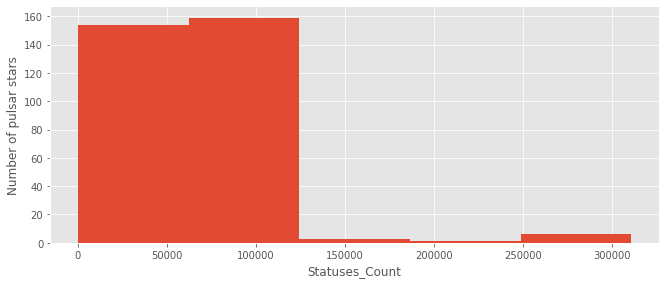

In [ ]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['Statuses_Count'].hist(bins=5)
fig.set_xlabel('Statuses_Count')
fig.set_ylabel('Number of pulsar stars')

In [ ]:
#labeling
#X = np.array(Final_dataset['score'])[:]
#y = np.array(Final_dataset['Label'])[:]

#X_word = np.array(Final_dataset['score_word_level'])
#y_word = np.array(Final_dataset['Label_word_level'])

#X_senetenc = np.array(Final_dataset['Sentenct_level_trust_score'])
#y_senetenc = np.array(Final_dataset['Label_senetence_level'])


X=pd.DataFrame(Final_dataset[['Tweet_Id','Sentenct_level_trust_score']])
y=Final_dataset['Label_senetence_level']

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# create dataset

# split into train test sets
#X_word_train, X_word_test, y_word_train, y_word_test = train_test_split(X_word, y_word, test_size=0.30)

X_sentence_train, X_sentence_test, y_sentence_train, y_sentence_test = train_test_split(X,y, test_size=0.30)

#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


In [ ]:
X_sentence_train.shape, X_sentence_test.shape

((226, 2), (97, 2))

In [ ]:
cols = X_sentence_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_sentence_train = scaler.fit_transform(X_sentence_train)

X_sentence_test = scaler.transform(X_sentence_test)

In [ ]:
X_sentence_train = pd.DataFrame(X_sentence_train, columns=[cols])

In [ ]:
X_sentence_test = pd.DataFrame(X_sentence_test, columns=[cols])

In [ ]:
X_sentence_train.describe()

,Tweet_Id,Sentenct_level_trust_score
count,2.260000e+02,8.000000e+00
mean,3.264252e-14,5.273559e-16
std,1.002220e+00,1.069045e+00
min,-8.562277e-01,-1.092661e+00
25%,-6.711155e-01,-7.515958e-01
50%,-4.039395e-01,-1.743203e-01
75%,2.371973e-01,4.446236e-01
max,2.895590e+00,2.123019e+00


In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_sentence_train,y_sentence_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


ValueError: ignored

In [ ]:
X_sentence_train

,Tweet_Id,Sentenct_level_trust_score
0,-0.816435,NaN
1,-0.670107,NaN
2,2.242243,NaN
3,-0.257950,NaN
4,-0.656308,NaN
...,...,...
221,-0.710161,NaN
222,0.345914,NaN
223,-0.474152,NaN
224,0.422356,NaN


In [ ]:


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
model_1_result2.to_csv('model_1_result.csv')

!cp model_1_result.csv "gdrive/My Drive/Colab Notebooks/"